In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from load_data_json import LoadDataset
from scipy.sparse.linalg import svds
from preprocess_restart import VectorSpaceModel2

In [19]:
def draw_Ab(path):
    with open(path, "r") as f:
        data = json.load(f)
    x = list(map(int, data.keys()))
    y1 = [abs(entry[0]) for entry in data.values()]
    y2 = [abs(entry[1]) for entry in data.values()]
    y3 = [abs(entry[2]) for entry in data.values()]

    # Plot the lines
    plt.plot(x, y1, label='v1')
    plt.plot(x, y2, label='v2')
    plt.plot(x, y3, label='v3')

    # Add labels and legend
    plt.xlabel('i')
    plt.ylabel('')
    plt.legend()

    # Show the plot
    plt.show()

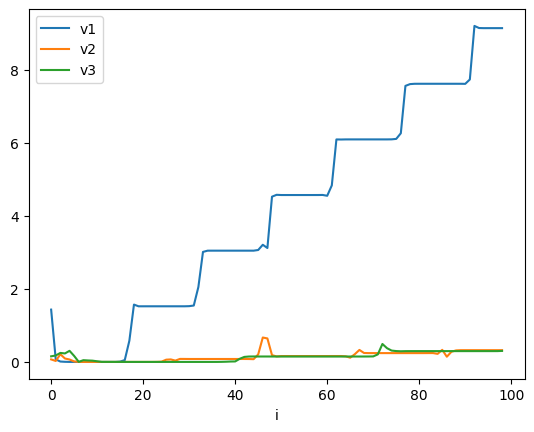

In [21]:
draw_Ab('Output\\npl\CompareToAb_left.json')

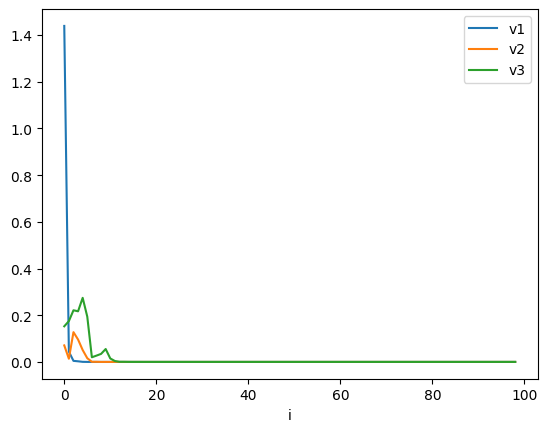

In [22]:
draw_Ab('Output\\npl\CompareToAb_reorthor_left.json')

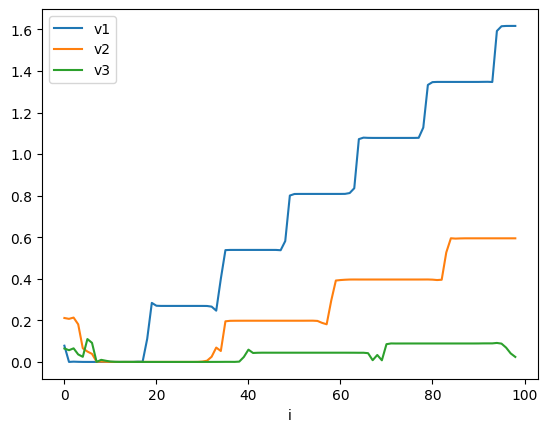

In [ ]:

draw_Ab('Output\med\CompareToAb_right.json')

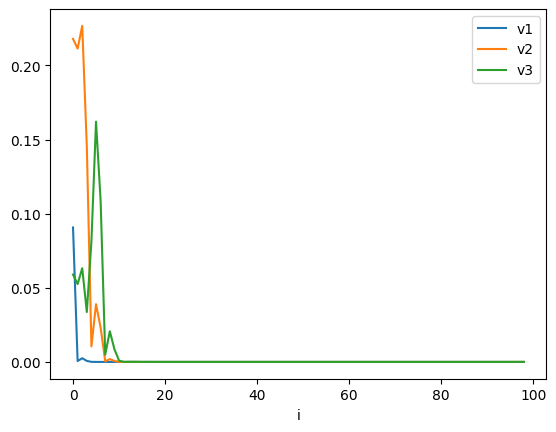

In [ ]:
draw_Ab('Output\med\CompareToAb_reorthor_right.json')

In [30]:
def draw_Akb(path):
    with open(path, "r") as f:
        data = json.load(f)
    x = list(map(int, data.keys()))
    y = [abs(entry) for entry in data.values()]
    
    # Plot the lines
    plt.plot(x, y)

    # Add labels and legend
    plt.xlabel('i')
    plt.ylabel('')
    plt.legend()

    # Show the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


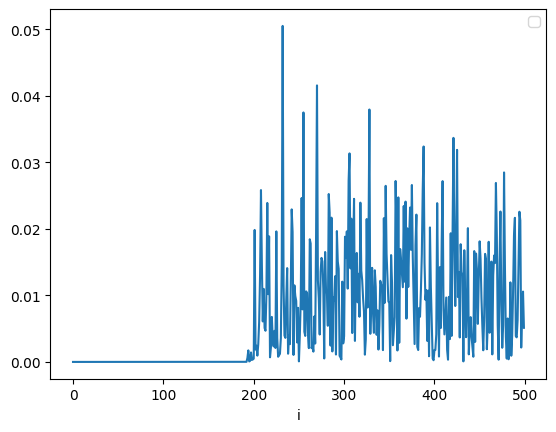

In [34]:
draw_Akb('Output\med\CompareToAk.json')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


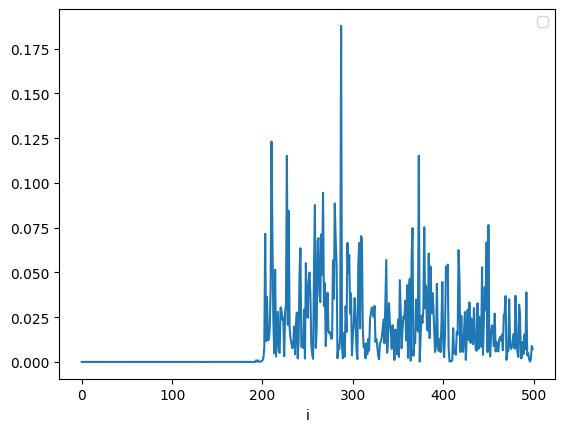

In [33]:
draw_Akb('Output\\npl\CompareToAk.json')

In [50]:
def distribute_sigma(data_name, k):
    dataset = LoadDataset(f"./data/{data_name}/{data_name}.json", f"./data/{data_name}/queries.json", f"./data/{data_name}/qrels-treceval.txt", data_name)
    u, sigma, vt = svds(dataset.doc_matrix, k=k)
    x = [i+1 for i in range(len(sigma))]
    y = sigma[::-1].tolist()
    # Plot the lines
    plt.plot(x, y)

    # Add labels and legend
    plt.xlabel('i')
    plt.ylabel('sigma')
    plt.legend()

    # Show the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


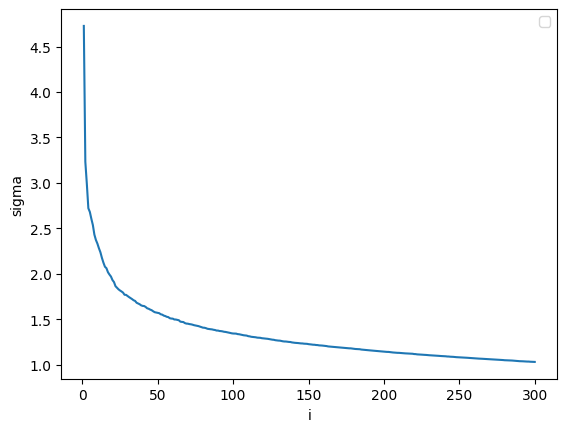

In [51]:
distribute_sigma('med', 300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


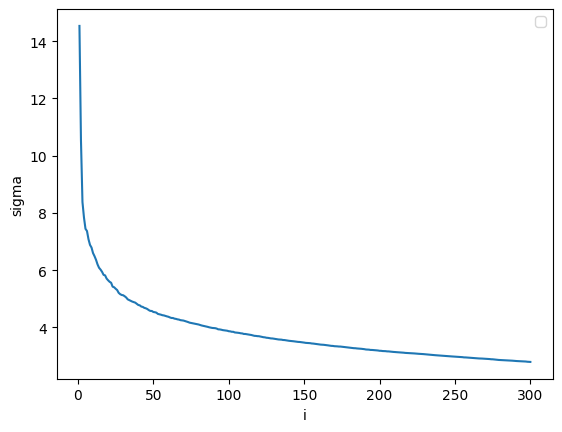

In [52]:
distribute_sigma('npl', 300)

In [2]:
def mean_precision(data_name):
    if data_name == 'med':
        k = 300
        interval = 20
    else:
        k = 800
        interval = 50
    dataset = LoadDataset(f"./data/{data_name}/{data_name}.json", f"./data/{data_name}/queries.json", f"./data/{data_name}/qrels-treceval.txt",data_name)
    vsm = vsm = VectorSpaceModel2(dataset.doc_matrix, dataset.name)
    relevance = dataset._load_relevance()
    path1 = f'Output\{data_name}\lanczos_dc_1.json'
    path2 = f'Output\{data_name}\lanczos_dc_2.json'
    path4 = f'Output\{data_name}\lanczos_dc_4.json'
    path = f'Output\{data_name}\sci_dc_1.json'
    x = []
    y1 = []
    y2 = []
    y4 = []
    y_lsi = []
    for i in range(interval, k+1, interval):
        x.append(i)
        retrieval = vsm.load_retrieval(path, i)
        y_lsi.append(vsm.mean_precision(relevance, retrieval))
        retrieval = vsm.load_retrieval(path1, i)
        y1.append(vsm.mean_precision(relevance, retrieval))
        retrieval = vsm.load_retrieval(path2, i)
        y2.append(vsm.mean_precision(relevance, retrieval))
        retrieval = vsm.load_retrieval(path4, i)
        y4.append(vsm.mean_precision(relevance, retrieval))
    plt.plot(x, y_lsi, label='lsi')
    plt.plot(x, y1, label='lanczos')
    plt.plot(x, y2, label='d&c_p2')
    plt.plot(x, y4, label='d&c_p4')

    # Add labels and legend
    plt.xlabel('i')
    plt.ylabel('Độ chính xác bình quân')
    plt.legend()

    # Show the plot
    plt.show()


c:\Users\dungl\anaconda3\envs\IR_VectorSpaceModel\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


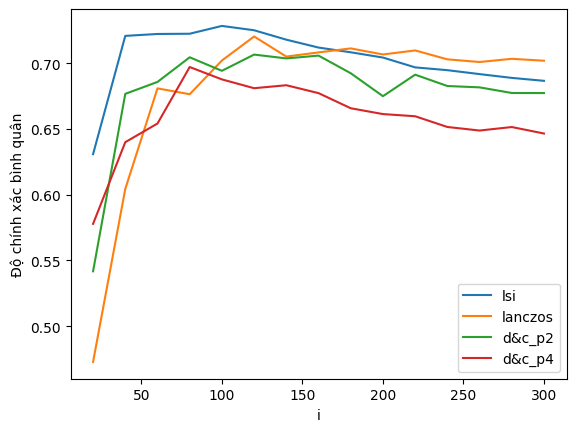

In [3]:
mean_precision('med')

c:\Users\dungl\anaconda3\envs\IR_VectorSpaceModel\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


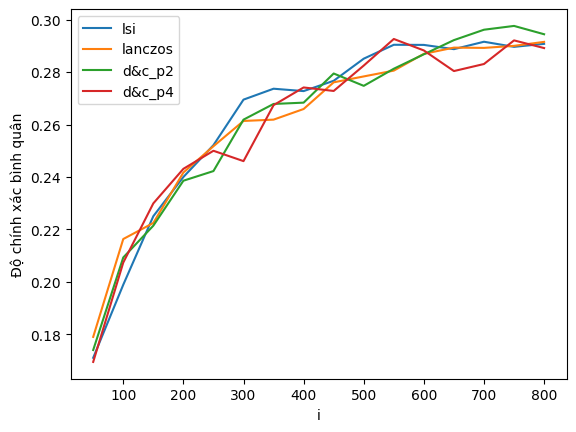

In [3]:
mean_precision('npl')

In [2]:
def precision_recall(data_name):
    if data_name == 'med':
        k = 300
    else:
        k = 800
    dataset = LoadDataset(f"./data/{data_name}/{data_name}.json", f"./data/{data_name}/queries.json", f"./data/{data_name}/qrels-treceval.txt",data_name)
    vsm = vsm = VectorSpaceModel2(dataset.doc_matrix, dataset.name)
    relevance = dataset._load_relevance()
    path1 = f'Output\{data_name}\lanczos_dc_1.json'
    path2 = f'Output\{data_name}\lanczos_dc_2.json'
    path4 = f'Output\{data_name}\lanczos_dc_4.json'
    path = f'Output\{data_name}\sci_dc_1.json'
    
    retrieval = vsm.load_retrieval(path, k)
    y_lsi, x_lsi = vsm.precision_recall(relevance, retrieval)
    retrieval = vsm.load_retrieval(path1, k)
    y_1, x_1 = vsm.precision_recall(relevance, retrieval)
    retrieval = vsm.load_retrieval(path2, k)
    y_2, x_2 = vsm.precision_recall(relevance, retrieval)
    retrieval = vsm.load_retrieval(path4, k)
    y_4, x_4 = vsm.precision_recall(relevance, retrieval)
       
    plt.plot(x_lsi, y_lsi, label='lsi')
    plt.plot(x_1, y_1, label='lanczos')
    plt.plot(x_2, y_2, label='d&c_p2')
    plt.plot(x_4, y_4, label='d&c_p4')

    # Add labels and legend
    plt.xlabel('recall')
    plt.ylabel('Độ chính xác')
    plt.legend()

    # Show the plot
    plt.show()

c:\Users\dungl\anaconda3\envs\IR_VectorSpaceModel\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


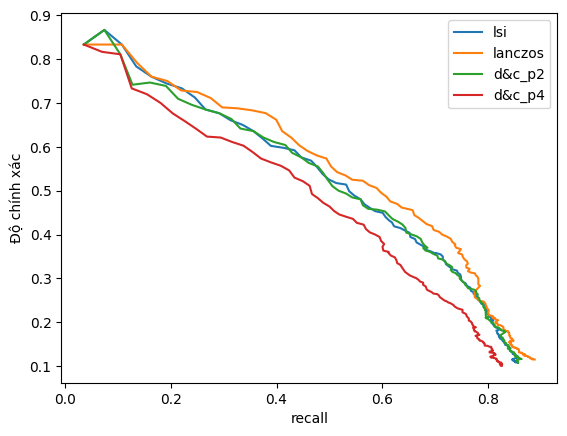

In [3]:
precision_recall('med')

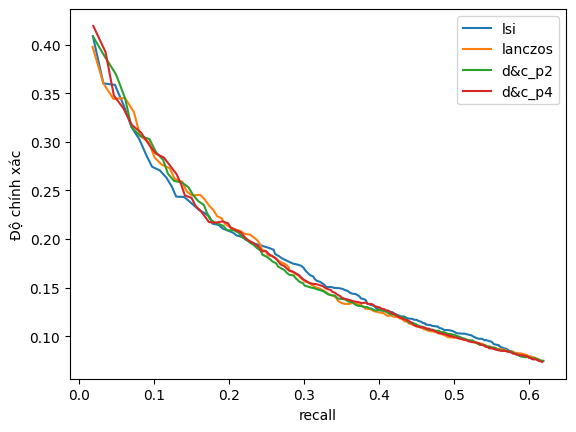

In [4]:
precision_recall('npl')

In [2]:
def running_time(data_name, type):
    if data_name == 'med':
        k = 300
        interval = 20
    else:
        k = 800
        interval = 50
    dataset = LoadDataset(f"./data/{data_name}/{data_name}.json", f"./data/{data_name}/queries.json", f"./data/{data_name}/qrels-treceval.txt",data_name)
    vsm = vsm = VectorSpaceModel2(dataset.doc_matrix, dataset.name)
    path1 = f'Output\{data_name}\lanczos_dc_1.json'
    path2 = f'Output\{data_name}\lanczos_dc_2.json'
    path4 = f'Output\{data_name}\lanczos_dc_4.json'
    path = f'Output\{data_name}\sci_dc_1.json'
    x = []
    y1 = []
    y2 = []
    y4 = []
    y_lsi = []
    for i in range(interval, k+1, interval):
        x.append(i)
        retrieval = vsm.load_retrieval(path, i)
        y_lsi.append(retrieval[type])
        retrieval = vsm.load_retrieval(path1, i)
        y1.append(retrieval[type])
        retrieval = vsm.load_retrieval(path2, i)
        y2.append(retrieval[type])
        retrieval = vsm.load_retrieval(path4, i)
        y4.append(retrieval[type])
    plt.plot(x, y_lsi, label='lsi')
    plt.plot(x, y1, label='lanczos')
    plt.plot(x, y2, label='d&c_p2')
    plt.plot(x, y4, label='d&c_p4')

    # Add labels and legend
    plt.xlabel('i')
    plt.ylabel('second')
    plt.legend()

    # Show the plot
    plt.show()

c:\Users\dungl\anaconda3\envs\IR_VectorSpaceModel\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


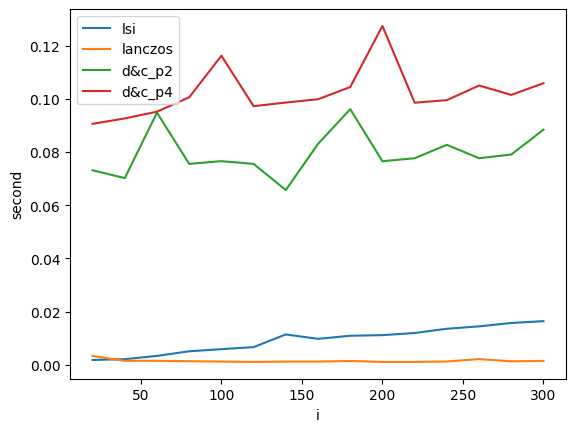

In [3]:
running_time('med', 'av_respone')

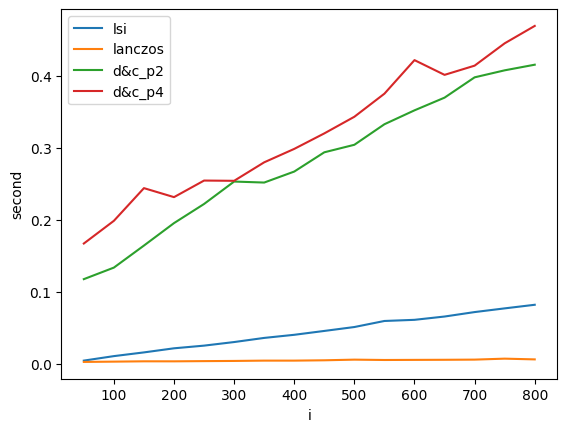

In [14]:
running_time('npl', 'av_respone')

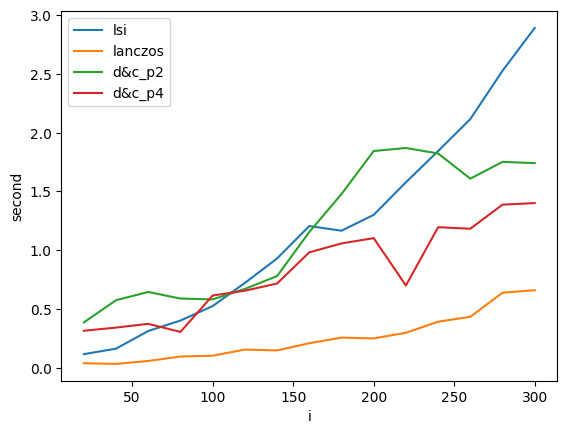

In [4]:
running_time('med', 'process')

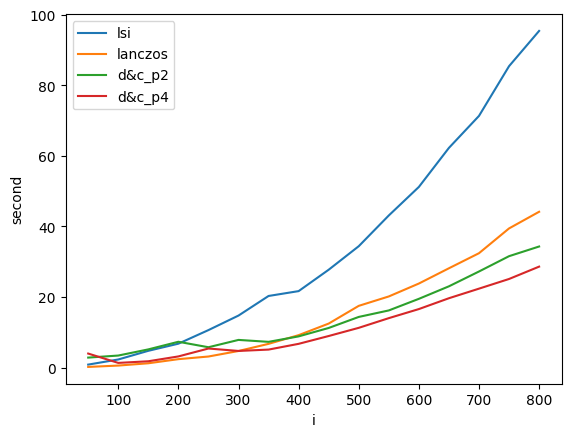

In [16]:
running_time('npl', 'process')